## Fragmentation results in ancient Sardinian data

In this script, we take a look at the ancient Sardinian data collected by the Novembre Lab recently and try to understand the fragmentation properties.



In [1]:
files <- list.files("../data/Sardinia_data_strand_flank/")
dir <- "../data/Sardinia_data_strand_flank/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample ISB001snp_sorted_deduped_chrALL.q30.csv 
We are at sample LON001snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA100snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA104snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA108snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA110snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA112snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA115snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA138snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA73snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA74snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA76snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA77snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA78snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA79snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA81snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA82snp_sorted_deduped_chrALL.q30.csv 
We are at sample MA85snp_sorted_dedup

In [2]:
length(files) ## the number of Sardinian samples in the dataset

[1] 26

In [8]:
## the names of the Sardinian samples

ancient_names <- as.character(sapply(files, function(x) return(strsplit(x, "[_]")[[1]][1])))
ancient_names
print(length(tab))

[1] "ISB001snp" "LON001snp" "MA100snp"  "MA104snp"  "MA108snp"  "MA110snp" 
 [7] "MA112snp"  "MA115snp"  "MA138snp"  "MA73snp"   "MA74snp"   "MA76snp"  
[13] "MA77snp"   "MA78snp"   "MA79snp"   "MA81snp"   "MA82snp"   "MA85snp"  
[19] "MA86snp"   "MA87snp"   "MA88snp"   "MA89snp"   "MA92snp"   "SUA001snp"
[25] "SUA002snp" "SUA003snp"

[1] 26


we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 
we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


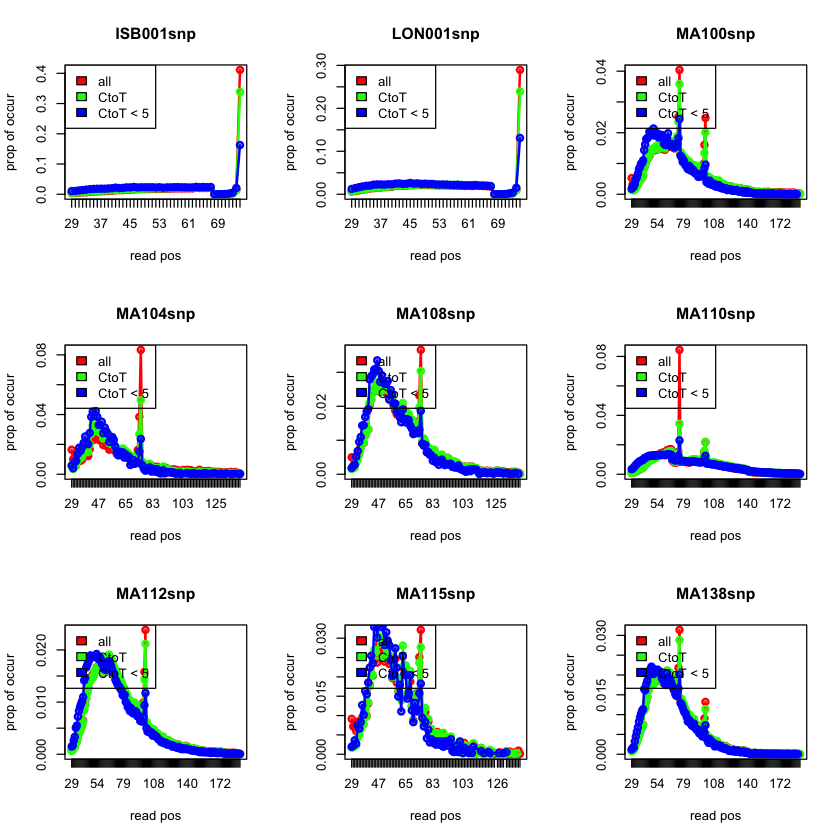

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 
we are at sample 24 
we are at sample 25 
we are at sample 26 


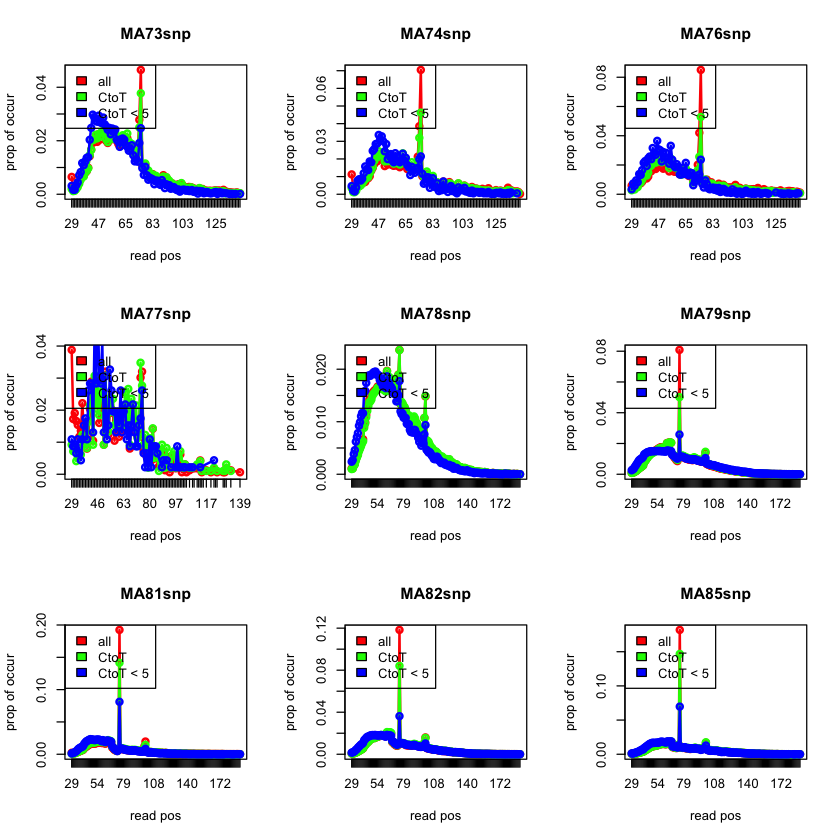

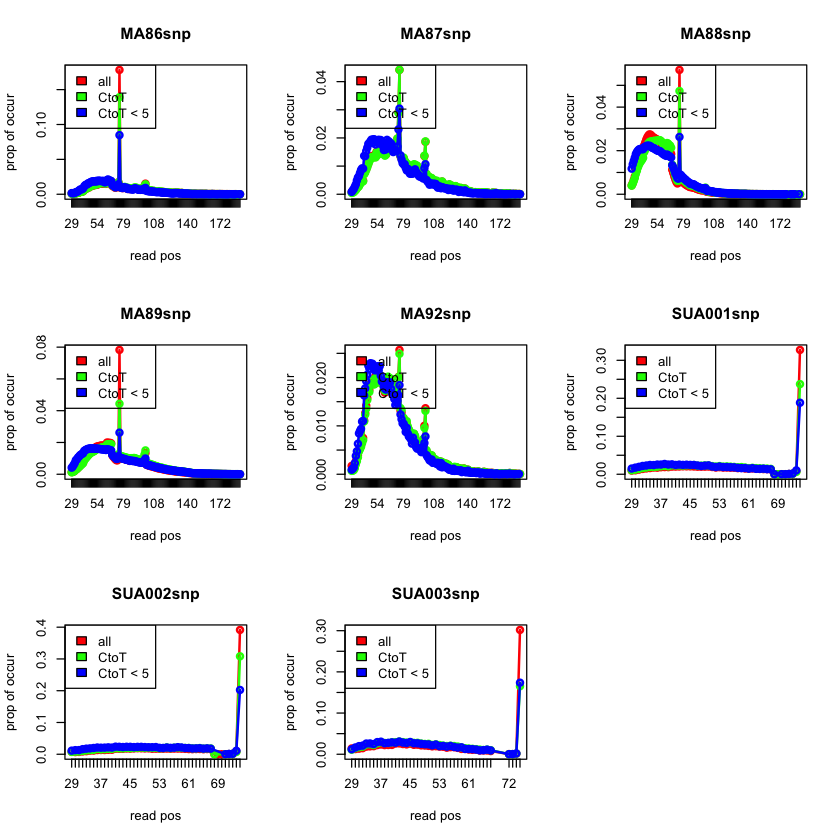

In [9]:
par(mfrow=c(3,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main=paste0(ancient_names[l]), xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"))
    cat("we are at sample", l, "\n")
}

In [10]:
##  1000 Genomes

files <- sample(list.files("../data/1000Gmoderns_data_strand_flank/"))[1:50]
dir <- "../data/1000Gmoderns_data_strand_flank/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample HG01431.mapped.ILLUMINA.bwa.CLM.low_coverage.20121211.q30.csv 
We are at sample HG01104.mapped.ILLUMINA.bwa.PUR.low_coverage.20130415.q30.csv 
We are at sample HG00463.mapped.ILLUMINA.bwa.CHS.low_coverage.20120522.q30.csv 
We are at sample HG00273.mapped.ILLUMINA.bwa.FIN.low_coverage.20130415.q30.csv 
We are at sample HG00276.mapped.ILLUMINA.bwa.FIN.low_coverage.20120522.q30.csv 
We are at sample HG00451.mapped.ILLUMINA.bwa.CHS.low_coverage.20130415.q30.csv 
We are at sample HG00308.mapped.ILLUMINA.bwa.FIN.low_coverage.20120522.q30.csv 
We are at sample HG00851.mapped.ILLUMINA.bwa.CDX.low_coverage.20130415.q30.csv 
We are at sample HG00115.mapped.ILLUMINA.bwa.GBR.low_coverage.20130415.q30.csv 
We are at sample HG01088.mapped.ILLUMINA.bwa.PUR.low_coverage.20121211.q30.csv 
We are at sample HG00233.mapped.ILLUMINA.bwa.GBR.low_coverage.20120522.q30.csv 
We are at sample HG01080.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30.csv 
We are at sample HG00306.mapped.ILLUMINA

In [11]:
modern_names <- as.character(sapply(files, function(x) return(strsplit(x, c("[.]"))[[1]][5])))

we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 


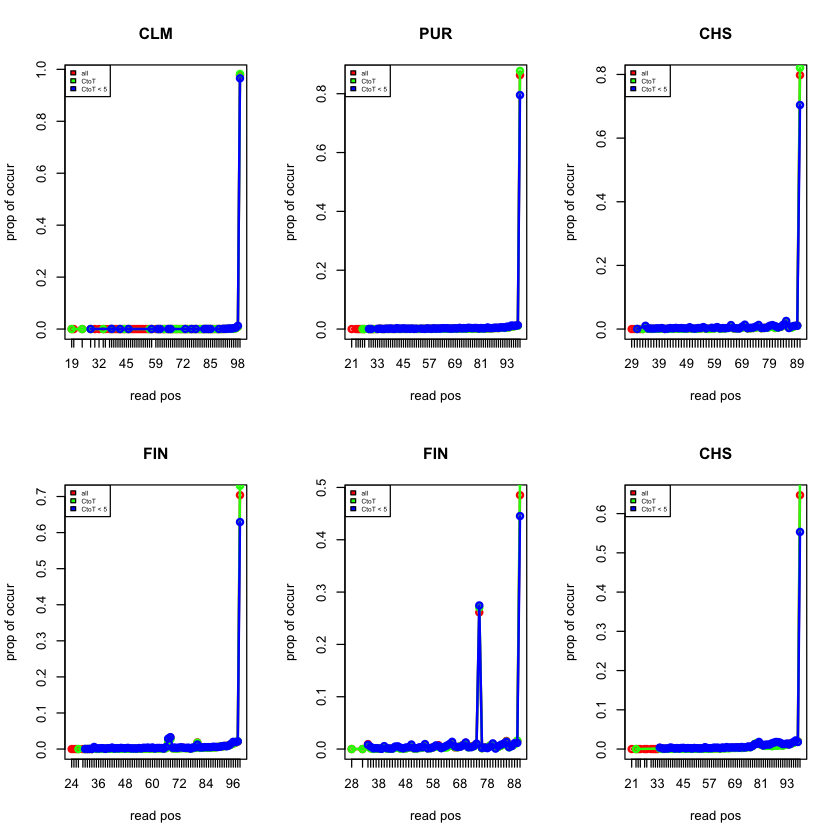

we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


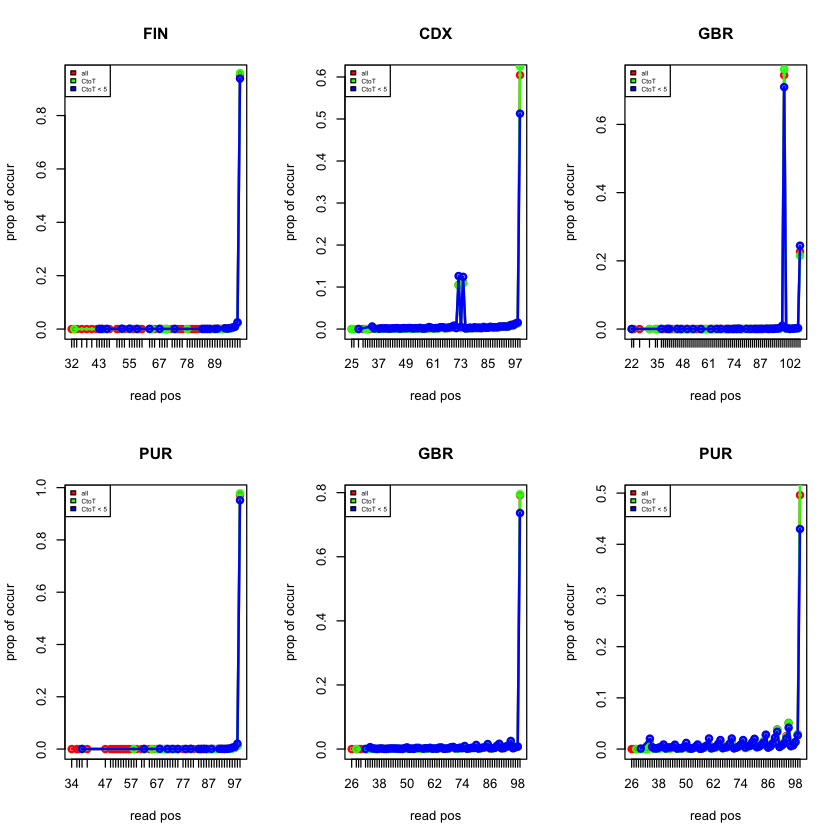

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 


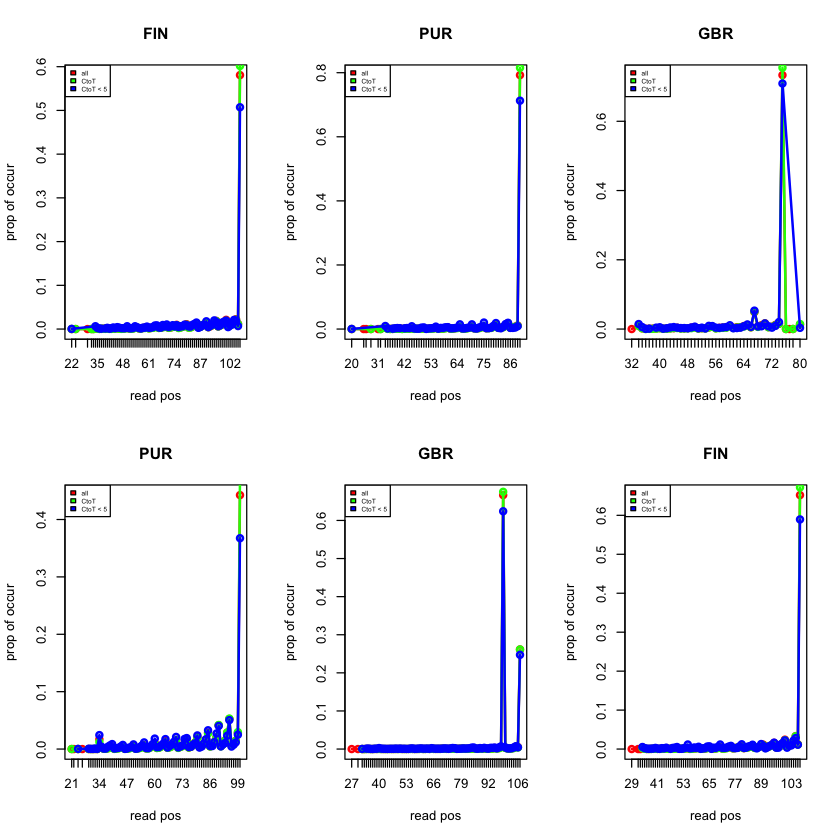

we are at sample 24 
we are at sample 25 
we are at sample 26 
we are at sample 27 
we are at sample 28 
we are at sample 29 


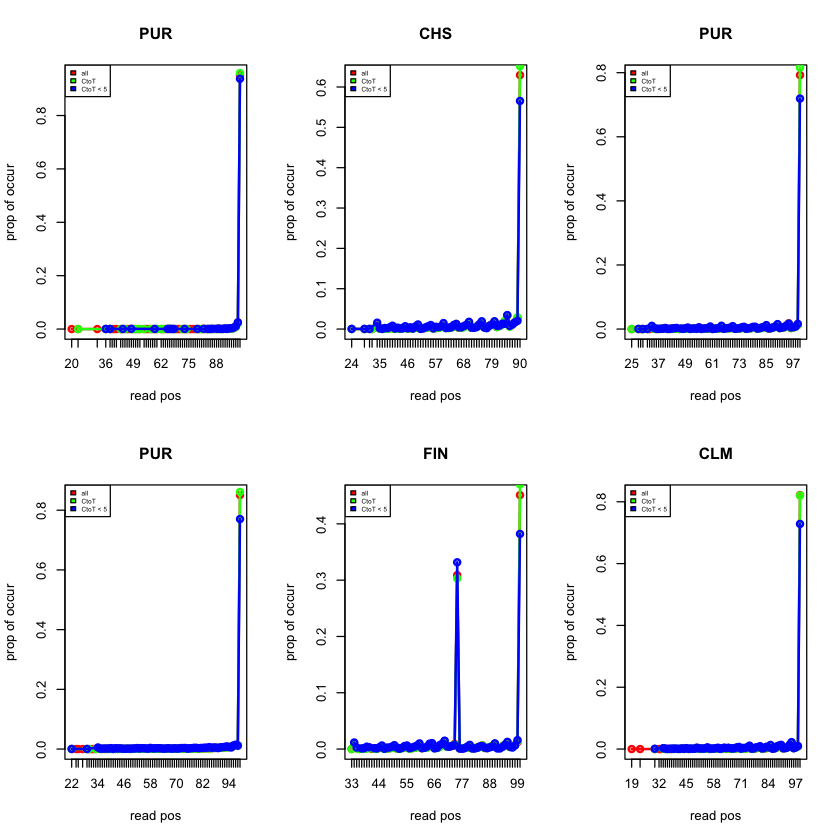

we are at sample 30 
we are at sample 31 
we are at sample 32 
we are at sample 33 
we are at sample 34 
we are at sample 35 


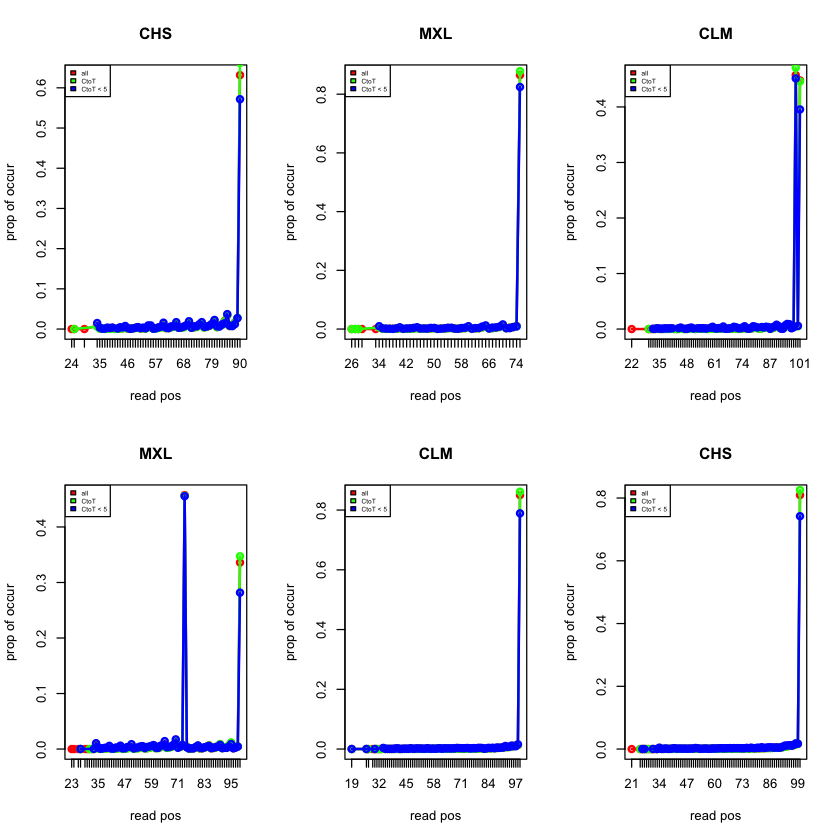

we are at sample 36 
we are at sample 37 
we are at sample 38 
we are at sample 39 
we are at sample 40 
we are at sample 41 


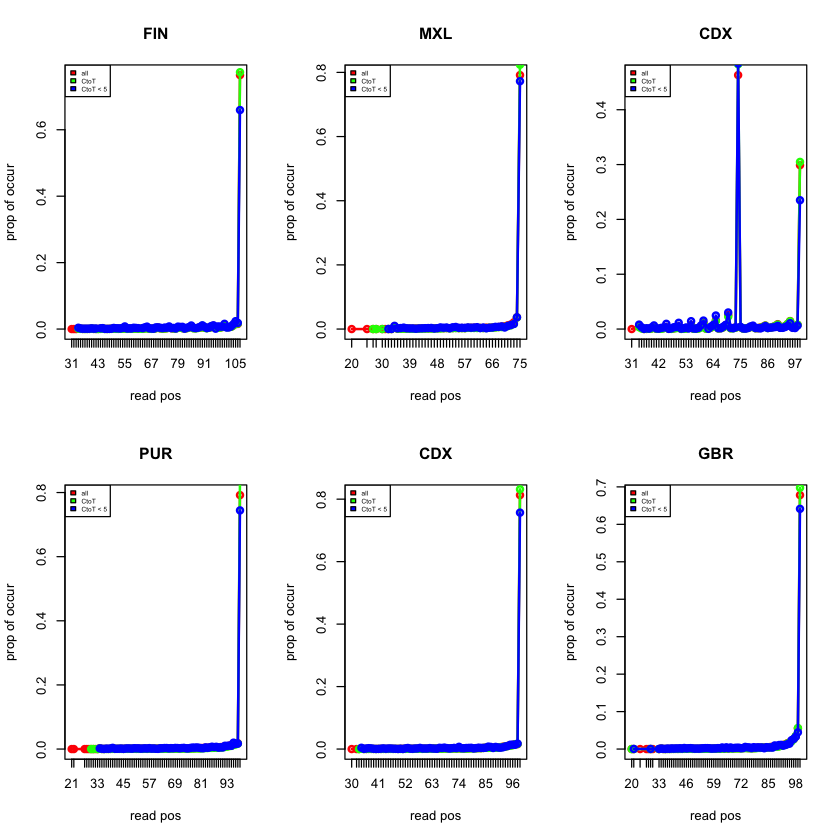

we are at sample 42 
we are at sample 43 
we are at sample 44 
we are at sample 45 
we are at sample 46 
we are at sample 47 


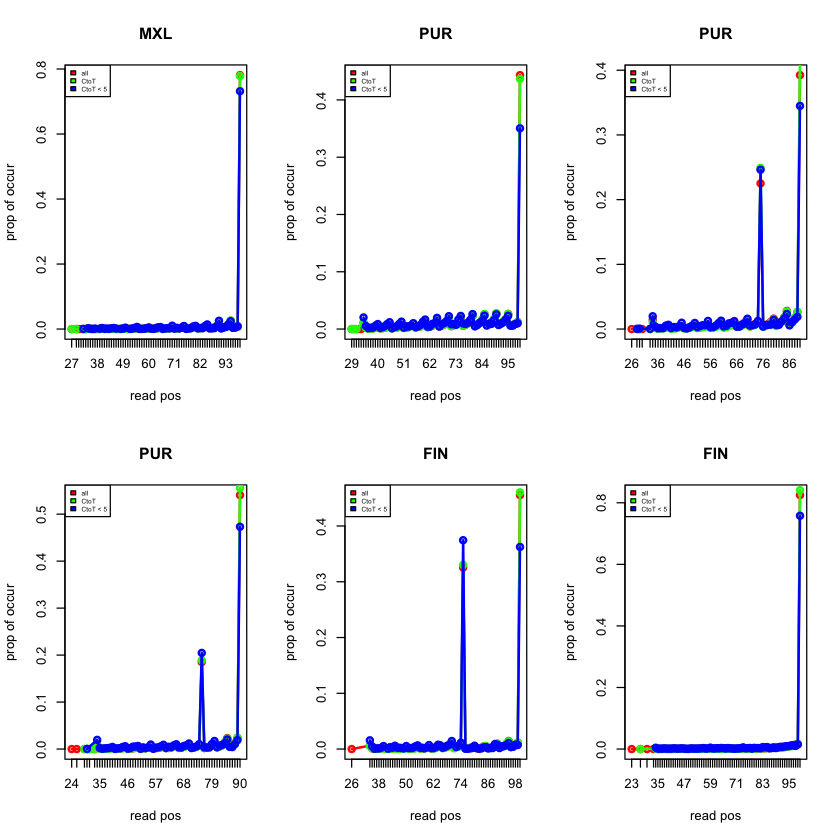

we are at sample 48 
we are at sample 49 
we are at sample 50 


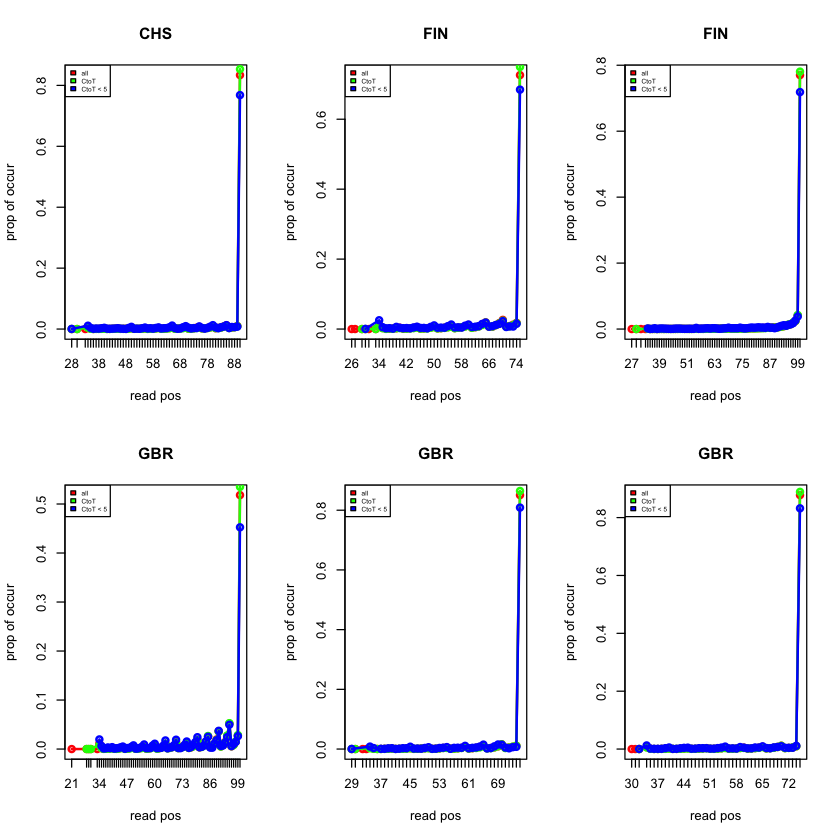

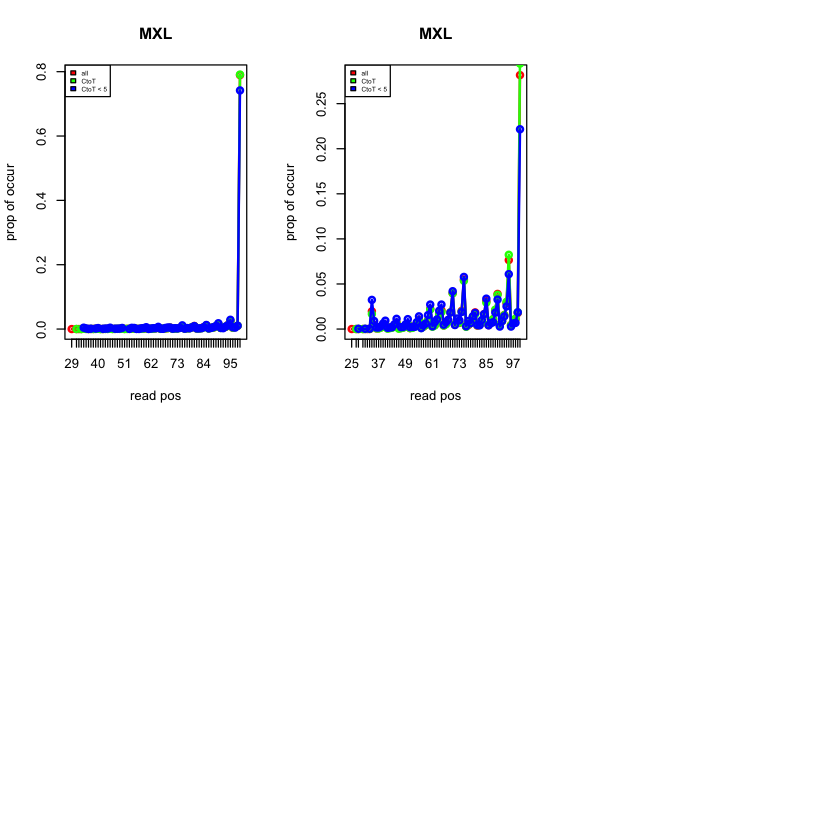

In [12]:
par(mfrow=c(2,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main=paste0(modern_names[l]), xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"), cex=0.5)
    cat("we are at sample", l, "\n")
}

## Conclusions

We find from these analysis 

- The Sardinian samples seem to show high concentration of fragments of length around 75.

- The "MA" Sardinian samples however show longer tails beyond the highest concentration of fragmnet kength 75, which goes beyond even 100 and 150 in length. Is this library prep issue?

- The other Sardinian samples show maximum fragment lengths of around 75.

- The modern samples (1000 Genomes) usually have the highest concentration at fragments of length 90 to 100.
